## Why Scatter Plots?

- Express relationships between multiple variables
- Helps find outliers

Find Relationship between GDP per captia and Life Expectancy

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


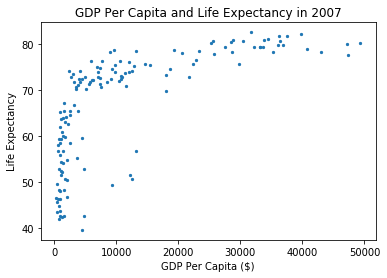

In [7]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Life Expectancy')
plt.show()

In [11]:
correlation_2007 = data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)
correlation_2007

0.6786623986777588

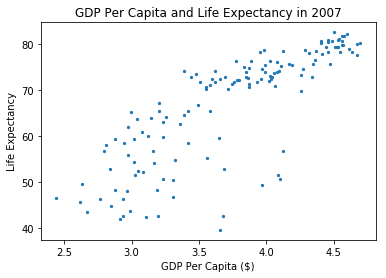

In [9]:
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 5)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Life Expectancy')
plt.show()

In [12]:
correlation_log_2007 = np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)
correlation_log_2007

0.8089802514849214

In [13]:
correlation_log_2007 > correlation_2007

True

In [17]:
years_sorted = sorted(set(data.year))

In [24]:
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(0,60000)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Life Expectancy')
    #plt.show()
    plt.savefig(str(given_year), dpi=200)
    plt.clf()

In [23]:
data[data.gdpPerCapita > 60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [27]:
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2,5)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita (log scale)')
    plt.ylabel('Life Expectancy')
    #plt.show()
    plt.savefig('log_' + str(given_year), dpi=200)
    plt.clf()

## Problem - Examine relationship between GDP and life expectancy in 2007

In [29]:
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [33]:
gdp_in_billions = (data_2007.gdpPerCapita * data_2007.population) / 10**9
gdp_in_billions

11         31.079292
23         21.376411
35        207.444852
47         59.583896
59        515.033625
71        703.658359
83        296.229401
95         21.112675
107       209.311822
119       350.141167
131        11.643152
143        34.854649
155        33.897027
167        20.603634
179      1722.598680
191        78.213929
203        17.435462
215         3.608510
227        24.218877
239        36.137516
251      1212.704378
263         3.084613
275        17.447580
287       214.496727
299      6539.500929
311       309.883886
323         0.701112
335        17.931726
347        13.805935
359        39.871565
            ...     
1355        5.299935
1367      214.643321
1379      101.750155
1391       51.774743
1403        8.445270
1415      407.844810
1427     1165.759889
1439       80.903553
1451      110.062907
1463        5.114071
1475      305.790367
1487      283.348281
1499       80.823488
1511      665.525791
1523       42.238972
1535      485.304044
1547        5

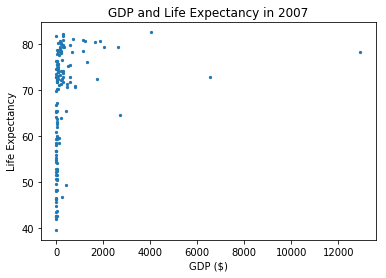

In [39]:
plt.scatter(gdp_in_billions, data_2007.lifeExpectancy, 5)
plt.title('GDP and Life Expectancy in 2007')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy')
plt.show()

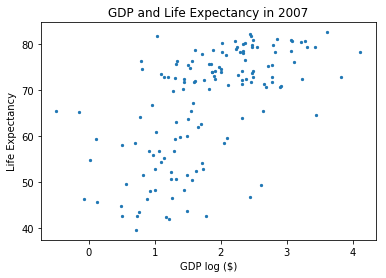

In [40]:
plt.scatter(np.log10(gdp_in_billions), data_2007.lifeExpectancy, 5)
plt.title('GDP and Life Expectancy in 2007')
plt.xlabel('GDP log ($)')
plt.ylabel('Life Expectancy')
plt.show()

In [45]:
correlation_loggdp_le_2007 = np.log10(gdp_in_billions).corr(data_2007.lifeExpectancy)
correlation_loggdppercap_le_2007 = np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)
print( correlation_loggdp_le_2007, correlation_loggdppercap_le_2007)

0.6000405376447576 0.8089802514849214


GDP per Capita is more highly correlated than GDP alone